# Version 1 
## Author: Xiaochi (George) Li

In [18]:
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

In [9]:
df = pd.read_excel("data.xlsx",thousands=",") #seperations in thousands

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 161542 to 346245
Data columns (total 26 columns):
Record Number                   80000 non-null object
MOU                             75347 non-null object
MOU Title                       75347 non-null object
Total Payments                  80000 non-null float64
Lump Sum Pay                    65157 non-null float64
Other Pay (Payroll Explorer)    80000 non-null float64
FMS Department                  80000 non-null int64
Job Class                       80000 non-null int64
Title                           80000 non-null object
Average Benefit Cost            80000 non-null float64
Time                            80000 non-null int64
Department                      80000 non-null object
p_dep                           64857 non-null float64
e_type                          80000 non-null object
Rate                            75347 non-null float64
POBP                            39056 non-null float64
p_bonus          

'Total payments, lump sum pay, other pay,POBP,p_bonus, t_bonus, o_pay, long,e_pay,Salary 需要转换成数字格式'

,Total Payments,Lump Sum Pay,Other Pay (Payroll Explorer),FMS Department,Job Class,Average Benefit Cost,Time,p_dep,Rate,POBP,p_bonus,t_bonus,o_pay,long,e_pay,insurance,financial,Salary
Total Payments,1.000000,0.121466,0.490746,-0.068125,0.188545,0.514691,-0.214700,-0.297586,0.297436,0.688354,0.450440,0.210194,0.622713,0.271205,0.242351,0.508247,-0.068125,0.924470
Lump Sum Pay,0.121466,1.000000,0.649853,-0.006884,0.038827,0.083995,-0.003527,-0.032704,0.082893,0.269171,-0.007368,0.013353,-0.009153,0.000873,0.090662,0.082543,-0.006884,0.018424
Other Pay (Payroll Explorer),0.490746,0.649853,1.000000,0.038957,0.014036,0.302223,-0.098593,-0.158425,0.152657,0.667899,0.400633,0.286381,0.294527,0.265837,0.676787,0.295023,0.038957,0.278843
FMS Department,-0.068125,-0.006884,0.038957,1.000000,0.118853,0.136570,0.008870,0.908533,-0.030218,-0.027539,-0.152443,-0.069268,-0.052594,-0.041720,0.211744,0.124107,1.000000,-0.075626
Job Class,0.188545,0.038827,0.014036,0.118853,1.000000,0.213648,0.013364,0.046922,0.091833,0.027443,-0.087838,0.002026,0.017071,0.015865,0.049106,0.223391,0.118853,0.234484
Average Benefit Cost,0.514691,0.083995,0.302223,0.136570,0.213648,1.000000,0.118816,-0.389113,0.233131,0.388956,0.157735,0.016011,0.271283,0.106636,0.300622,0.999180,0.136570,0.484832
Time,-0.214700,-0.003527,-0.098593,0.008870,0.013364,0.118816,1.000000,-0.000651,0.047869,0.046064,-0.086213,-0.027383,-0.024090,-0.194657,-0.029940,0.124600,0.008870,-0.245398
p_dep,-0.297586,-0.032704,-0.158425,0.908533,0.046922,-0.389113,-0.000651,1.000000,-0.162397,-0.213308,-0.189000,-0.037421,-0.169540,-0.086745,-0.069380,-0.390740,0.908533,-0.278464
Rate,0.297436,0.082893,0.152657,-0.030218,0.091833,0.233131,0.047869,-0.162397,1.000000,0.113900,0.113270,0.058670,0.072759,0.055957,0.062678,0.231225,-0.030218,0.319955
POBP,0.688354,0.269171,0.667899,-0.027539,0.027443,0.388956,0.046064,-0.213308,0.113900,1.000000,0.462010,0.158576,0.898115,0.224899,0.415760,0.380789,-0.027539,0.342089


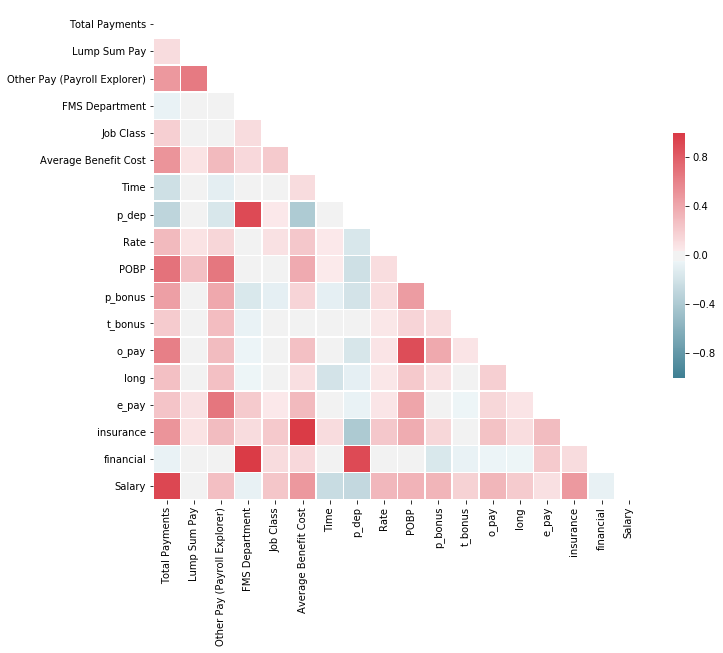

In [23]:
# Correlation
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
corr

In [24]:
# 这里我列举了各个列的空缺情况，可以结合correlation做impute

null_rate = df.isnull().sum(axis = 0).sort_values(ascending = False)/float((len(df)))
null_rate

POBP                            0.511800
p_dep                           0.189287
p_grade                         0.189287
Lump Sum Pay                    0.185537
benefit                         0.178262
MOU                             0.058162
MOU Title                       0.058162
Rate                            0.058162
o_pay                           0.003750
Average Benefit Cost            0.000000
Total Payments                  0.000000
Other Pay (Payroll Explorer)    0.000000
FMS Department                  0.000000
Job Class                       0.000000
Title                           0.000000
Salary                          0.000000
Time                            0.000000
Department                      0.000000
financial                       0.000000
e_type                          0.000000
p_bonus                         0.000000
t_bonus                         0.000000
long                            0.000000
e_pay                           0.000000
insurance       